# HomeWork1-Exploratory Data Analysis

### Loading Python Modules

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import requests
import sklearn
import scipy.stats
import seaborn as sns
from ggplot import *

### Problem 1
In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.

### Problem 1(a)
Load in these CSV files from the Sean Lahman's Baseball Database. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas DataFrame and show the head of each table.

Hint Use the requests, StringIO and zipfile modules to get from the web.

In [101]:
Salaries=pd.read_csv('C:/Users/Varnith/Desktop/lahman-csv_2014-02-14/Salaries.csv')
Teams=pd.read_csv('C:/Users/Varnith/Desktop/lahman-csv_2014-02-14/Teams.csv')
Salaries.head()
Teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [102]:
summarized=pd.DataFrame(Salaries.groupby(['teamID','yearID'])['salary'].sum().reset_index())
summarized.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


### Problem 1(c)
Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

Hint: Merge the DataFrames using teamID and yearID.

In [103]:
Merged_Dataset=pd.merge(Teams,summarized,on=['teamID','yearID'],how='inner')
Merged_Dataset=Merged_Dataset[['W','salary','teamID','yearID']]
Merged_Dataset.head()

,W,salary,teamID,yearID
0,99,8812550,TOR,1985
1,97,14238204,NYA,1985
2,84,10348143,DET,1985
3,83,11560712,BAL,1985
4,81,10897560,BOS,1985


### Problem 1(d)
How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?

Hints: Use a for loop to consider multiple years. Use the teamID (three letter representation of the team name) to save space on the plot.

Enter a Year:2013
Enter a Year:1653
Invalid Year
Enter a Year:1800
Invalid Year
Enter a Year:1898
Invalid Year
Enter a Year:1900
Invalid Year
Enter a Year:2000
Enter a Year:-1


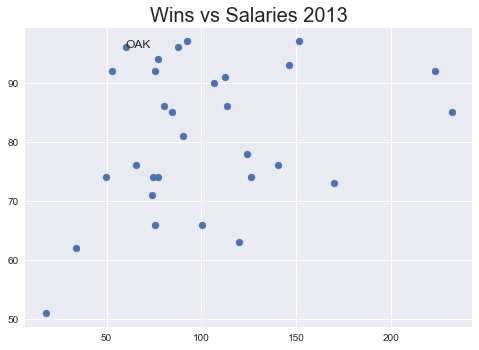

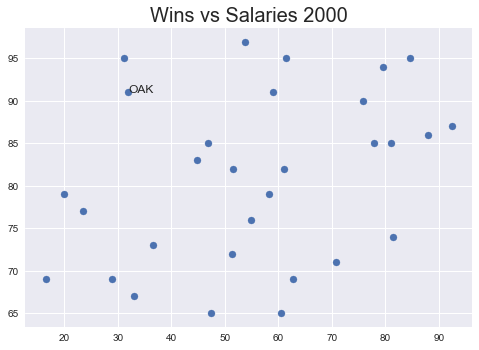

In [104]:
Year=0
Year_List=[]
while Year!=-1:
    Year=int(input("Enter a Year:"))
    if Year==-1:
        break
    if Year in Merged_Dataset.yearID.unique():
        Year_List.append(Year)
    else:
        print('Invalid Year')

for years in Year_List:
    plt.scatter(Merged_Dataset['salary'][Merged_Dataset.yearID==years]/1e6,Merged_Dataset['W'][Merged_Dataset.yearID==years])
    plt.title('Wins vs Salaries'+" "+str(years),fontsize=20)
    plt.annotate('OAK',xy=(Merged_Dataset['salary'][(Merged_Dataset['teamID']=='OAK') & (Merged_Dataset.yearID==years)]/1e6,Merged_Dataset['W'][(Merged_Dataset['teamID']=='OAK') & (Merged_Dataset.yearID==years)]))
    plt.show()

### Problem 1(e):
For AC209 Students: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d).

In [105]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
Years= Merged_Dataset.yearID.unique()
Final_Data=pd.DataFrame()
for years in Years:
    X=pd.DataFrame(Merged_Dataset.salary[Merged_Dataset.yearID==years])
    lm.fit(X,Merged_Dataset.W[Merged_Dataset.yearID==years])
    a=(lm.predict(X)-Merged_Dataset.W[Merged_Dataset.yearID==years])
    b=years
    c=Merged_Dataset.teamID[Merged_Dataset.yearID==years]
    s=pd.DataFrame({'Resid':a,'Year':b,'teamid':c})
    Final_Data=Final_Data.append(s)
Final_Data

,Resid,Year,teamid
0,-20.390672,1985,TOR
1,-8.946949,1985,NYA
2,-2.717867,1985,DET
3,0.392692,1985,BAL
4,1.238431,1985,BOS
5,11.911242,1985,ML4
6,14.674104,1985,CLE
7,-11.505369,1985,KCA
8,-1.616781,1985,CAL
9,-4.591572,1985,CHA


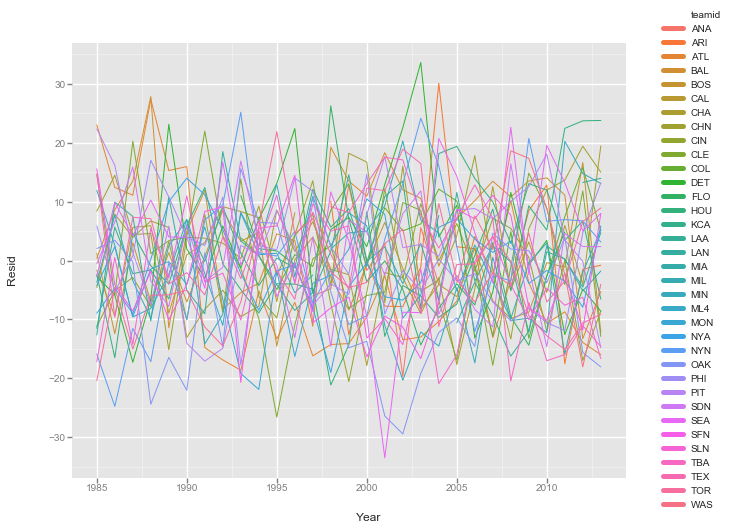

<ggplot: (102937693262)>

In [106]:
ggplot(aes(x='Year',y='Resid',color='teamid'),data=Final_Data)+geom_line()

**Imported ggplot from R.Makes Visualizations Easier.Cant Figure out anything from this.**

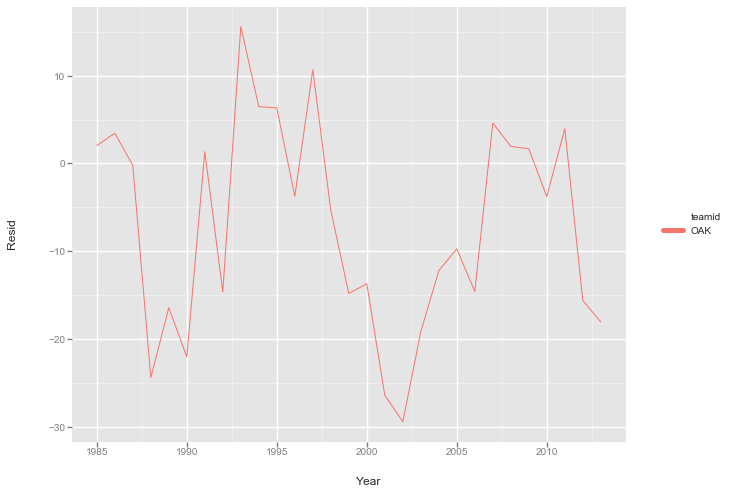

<ggplot: (102937758938)>

In [107]:
ggplot(aes(x='Year',y='Resid',color='teamid'),data=Final_Data[Final_Data.teamid=='OAK'])+geom_line()

### Problem 2
Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades.

### Problem 2(a)
Using the list of countries by continent from World Atlas data, load in the countries.csv file into a pandas DataFrame and name this data set as countries. This data set can be found on Github in the 2014_data repository here.

In [108]:
Income=pd.read_excel('C:/Users/Varnith/Desktop/indicator gapminder gdp_per_capita_ppp.xlsx')
Income.drop(Income.index[[260,261]],inplace=True)


In [109]:
Income_Transposed=Income.transpose()
Income_Transposed.columns=Income_Transposed.iloc[0]
Income_Transposed['Year']=Income_Transposed.index
Income_Transposed.drop(Income_Transposed.index[[0]],inplace=True)
Income_Transposed.index=list(range(216))

In [110]:
countries=pd.read_csv("C:/Users/Varnith/Desktop/Countries.csv")
countries.rename(columns={'Country':'country'},inplace=True)
countries=countries[['country','Region']]

### Problem 2(b)
Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000). What kind of plot would be best?

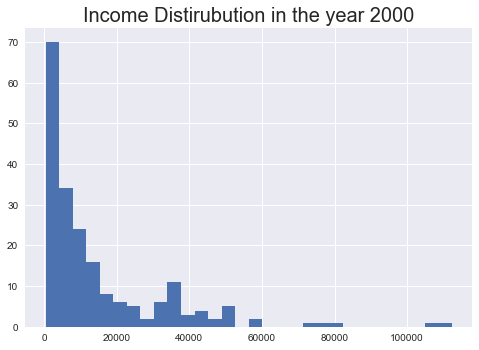

In [111]:
plt.hist(Income.ix[:,[2000]].dropna(),30)
plt.title('Income Distirubution in the year 2000',fontsize=20)
plt.show()

### Problem 2(c)
Write a function to merge the countries and income data sets for any given year.

In [112]:
Income.rename(columns={'GDP per capita':'country'},inplace=True)
def merge_countries(year):
    Income_V1=Income.ix[:,['country',year]]
    Income_V1=Income_V1.rename(columns={year:'Income'})
    a=pd.merge(countries,Income_V1,on="country",how="inner")
    return a

merge_countries(1800)

,country,Region,Income
0,Algeria,AFRICA,716.0
1,Angola,AFRICA,618.0
2,Benin,AFRICA,597.0
3,Botswana,AFRICA,397.0
4,Burundi,AFRICA,418.0
5,Cameroon,AFRICA,626.0
6,Cape Verde,AFRICA,529.0
7,Central African Republic,AFRICA,424.0
8,Chad,AFRICA,418.0
9,Comoros,AFRICA,696.0


### Problem 2(d)
Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

Hint: Use a for loop to consider multiple years.

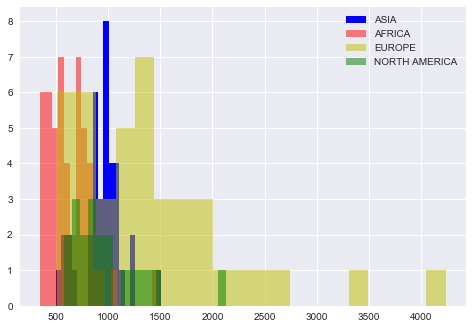

In [113]:
plt.hist(merge_countries(1800).Income[merge_countries(1800).Region=='ASIA'].dropna(),bins=20, histtype='stepfilled', color='b',label='ASIA')
plt.hist(merge_countries(1800).Income[merge_countries(1800).Region=='AFRICA'].dropna(),bins=20, histtype='stepfilled',alpha=.5,color='r',label='AFRICA')
plt.hist(merge_countries(1800).Income[merge_countries(1800).Region=='EUROPE'].dropna(),bins=20, histtype='stepfilled',alpha=.5,color='y',label='EUROPE')
plt.hist(merge_countries(1800).Income[merge_countries(1800).Region=='NORTH AMERICA'].dropna(),bins=20, histtype='stepfilled',alpha=.5,color='g',label='NORTH AMERICA')
plt.legend()
plt.show()

** Tough to figure out the distribution as a whole.**

Enter a Year:1872
Enter a Year:2015
Enter a Year:-1


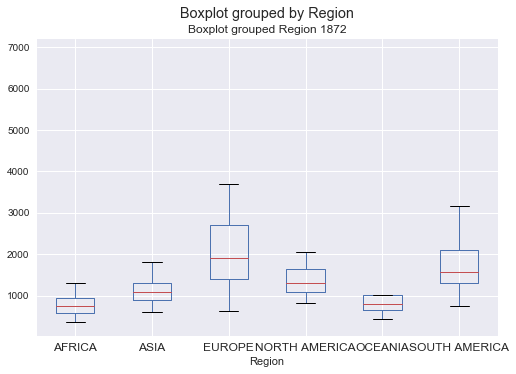

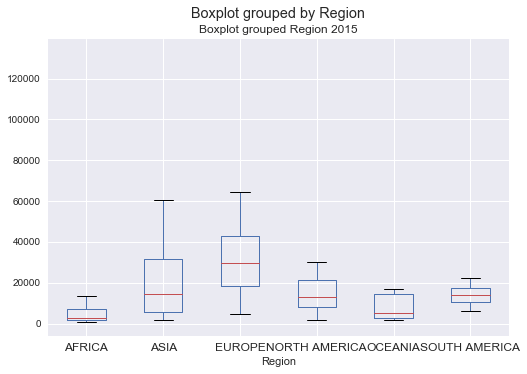

In [114]:
##Enter -1 to break the loop
Year=0
Year_List=[]
while Year!=-1:
    Year=int(input("Enter a Year:"))
    if Year==-1:
        break
    if Year>=1800 and Year<=2015:
        Year_List.append(Year)
    else:
        print('Invalid Year')
        
for years in Year_List:
    merge_countries(years).boxplot('Income',by='Region')
    plt.title('Boxplot grouped Region'+ " " +str(years))
    plt.show()

## Problem 3 
In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below.

### Problem 3(a)
Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y. If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a?

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y.

Hint: Use the scipy.stats module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function.

Update: Assume Y is normally distributed with mean equal to 0.

Show the curve for different values of a (a = 2,3,4 and 5).

In [115]:
def RatioNormals(diff,a):
    X=scipy.stats.norm(loc=diff,scale=1)
    Y=scipy.stats.norm(loc=1,scale=1)
    return X.cdf(a)/Y.cdf(a)

Ratio=[]
for a in range(2,6):
    for diff in range(1,4):
        s=RatioNormals(diff,a)
        Ratio.append(s)
Ratio

[1.0,
 0.59428670867253008,
 0.18857341734506025,
 1.0,
 0.86093104084607441,
 0.51163987465842908,
 1.0,
 0.978570838901064,
 0.84248201087670915,
 1.0,
 0.9986817314590013,
 0.97728081974900194]

**Found it hard to visualize this and plot it.Will come back to this later.**

### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region?

Update: Use the year 2012.

In [116]:
b=pd.DataFrame(merge_countries(2012).groupby('Region',as_index=False)['Income'].mean())
b[(b.Region=='ASIA')|(b.Region=='SOUTH AMERICA')]

,Region,Income
1,ASIA,23500.432432
5,SOUTH AMERICA,13015.750000


### Problem 3(c)
Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

Update: Use the year 2012.

In [117]:
b=merge_countries(2012)[merge_countries(2012).Income>10000].groupby('Region',as_index=False)['country'].count()
a=merge_countries(2012).groupby('Region',as_index=False)['country'].count()
b['Proportion']=b['country']/a['country']
b

,Region,country,Proportion
0,AFRICA,10,0.200000
1,ASIA,21,0.567568
2,EUROPE,37,0.840909
3,NORTH AMERICA,13,0.650000
4,OCEANIA,4,0.307692
5,SOUTH AMERICA,9,0.750000


**Dataset from problem 3d does not seem to be available.**